<span style="color:blue">**Using Machine Learning to Predict Carbon Footprint:<br> K-Means Clustering**</span><br>





<img src="/Users/miguelopez/Desktop/4-Proyecto ML/img/carbon.png" width="500">

In [195]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline



In [196]:
df = pd.read_csv('/Users/miguelopez/Desktop/4-Proyecto ML/src/data_processed/df_final.csv')

In [197]:
df.tail()

,Unnamed: 0,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,...,Cooking_With_['Oven'],"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[]
9995,9995,0.722892,0.026803,0.666667,0.500000,0.54,0.375000,0.260439,0,1,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0.738956,0.531653,0.333333,0.583333,0.16,1.000000,0.344195,1,0,...,0,0,0,1,0,0,0,0,0,0
9997,9997,0.995984,0.009601,0.666667,0.458333,0.10,1.000000,0.256598,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,0.518072,0.868887,0.666667,0.791667,0.28,0.208333,0.528807,0,0,...,0,0,1,0,0,0,0,0,0,0
9999,9999,0.261044,0.995300,0.500000,0.458333,0.12,0.000000,0.064428,0,1,...,0,0,0,0,0,0,0,0,0,0


In [198]:
df.columns

Index(['Unnamed: 0', 'Monthly Grocery Bill', 'Vehicle Monthly Distance Km',
       'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'CarbonEmission', 'Body Type_normal', 'Body Type_obese',
       'Body Type_overweight', 'Body Type_underweight', 'Sex_female',
       'Sex_male', 'Diet_omnivore', 'Diet_pescatarian', 'Diet_vegan',
       'Diet_vegetarian', 'How Often Shower_daily',
       'How Often Shower_less frequently', 'How Often Shower_more frequently',
       'How Often Shower_twice a day', 'Heating Energy Source_coal',
       'Heating Energy Source_electricity',
       'Heating Energy Source_natural gas', 'Heating Energy Source_wood',
       'Transport_private', 'Transport_public', 'Transport_walk/bicycle',
       'Vehicle Type_diesel', 'Vehicle Type_electric', 'Vehicle Type_hybrid',
       'Vehicle Type_lpg', 'Vehicle Type_petrol', 'Social Activity_never',
       'Social Activity_often', 'Social Ac

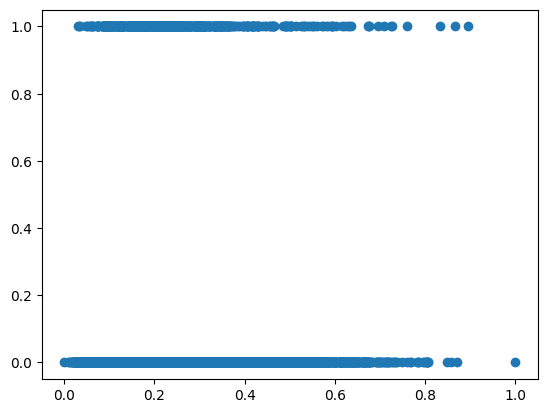

In [199]:
# carbon emissions vs "Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']
plt.scatter(df["CarbonEmission"],df["Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']"])   

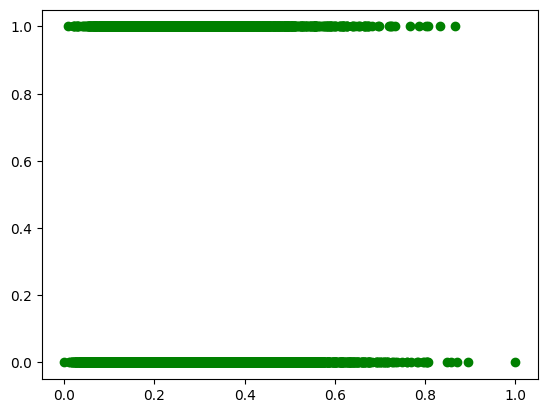

In [200]:
# Carbon Emissions vs Diet omnivore
plt.scatter(df['CarbonEmission'], df['Diet_omnivore'],color='green')

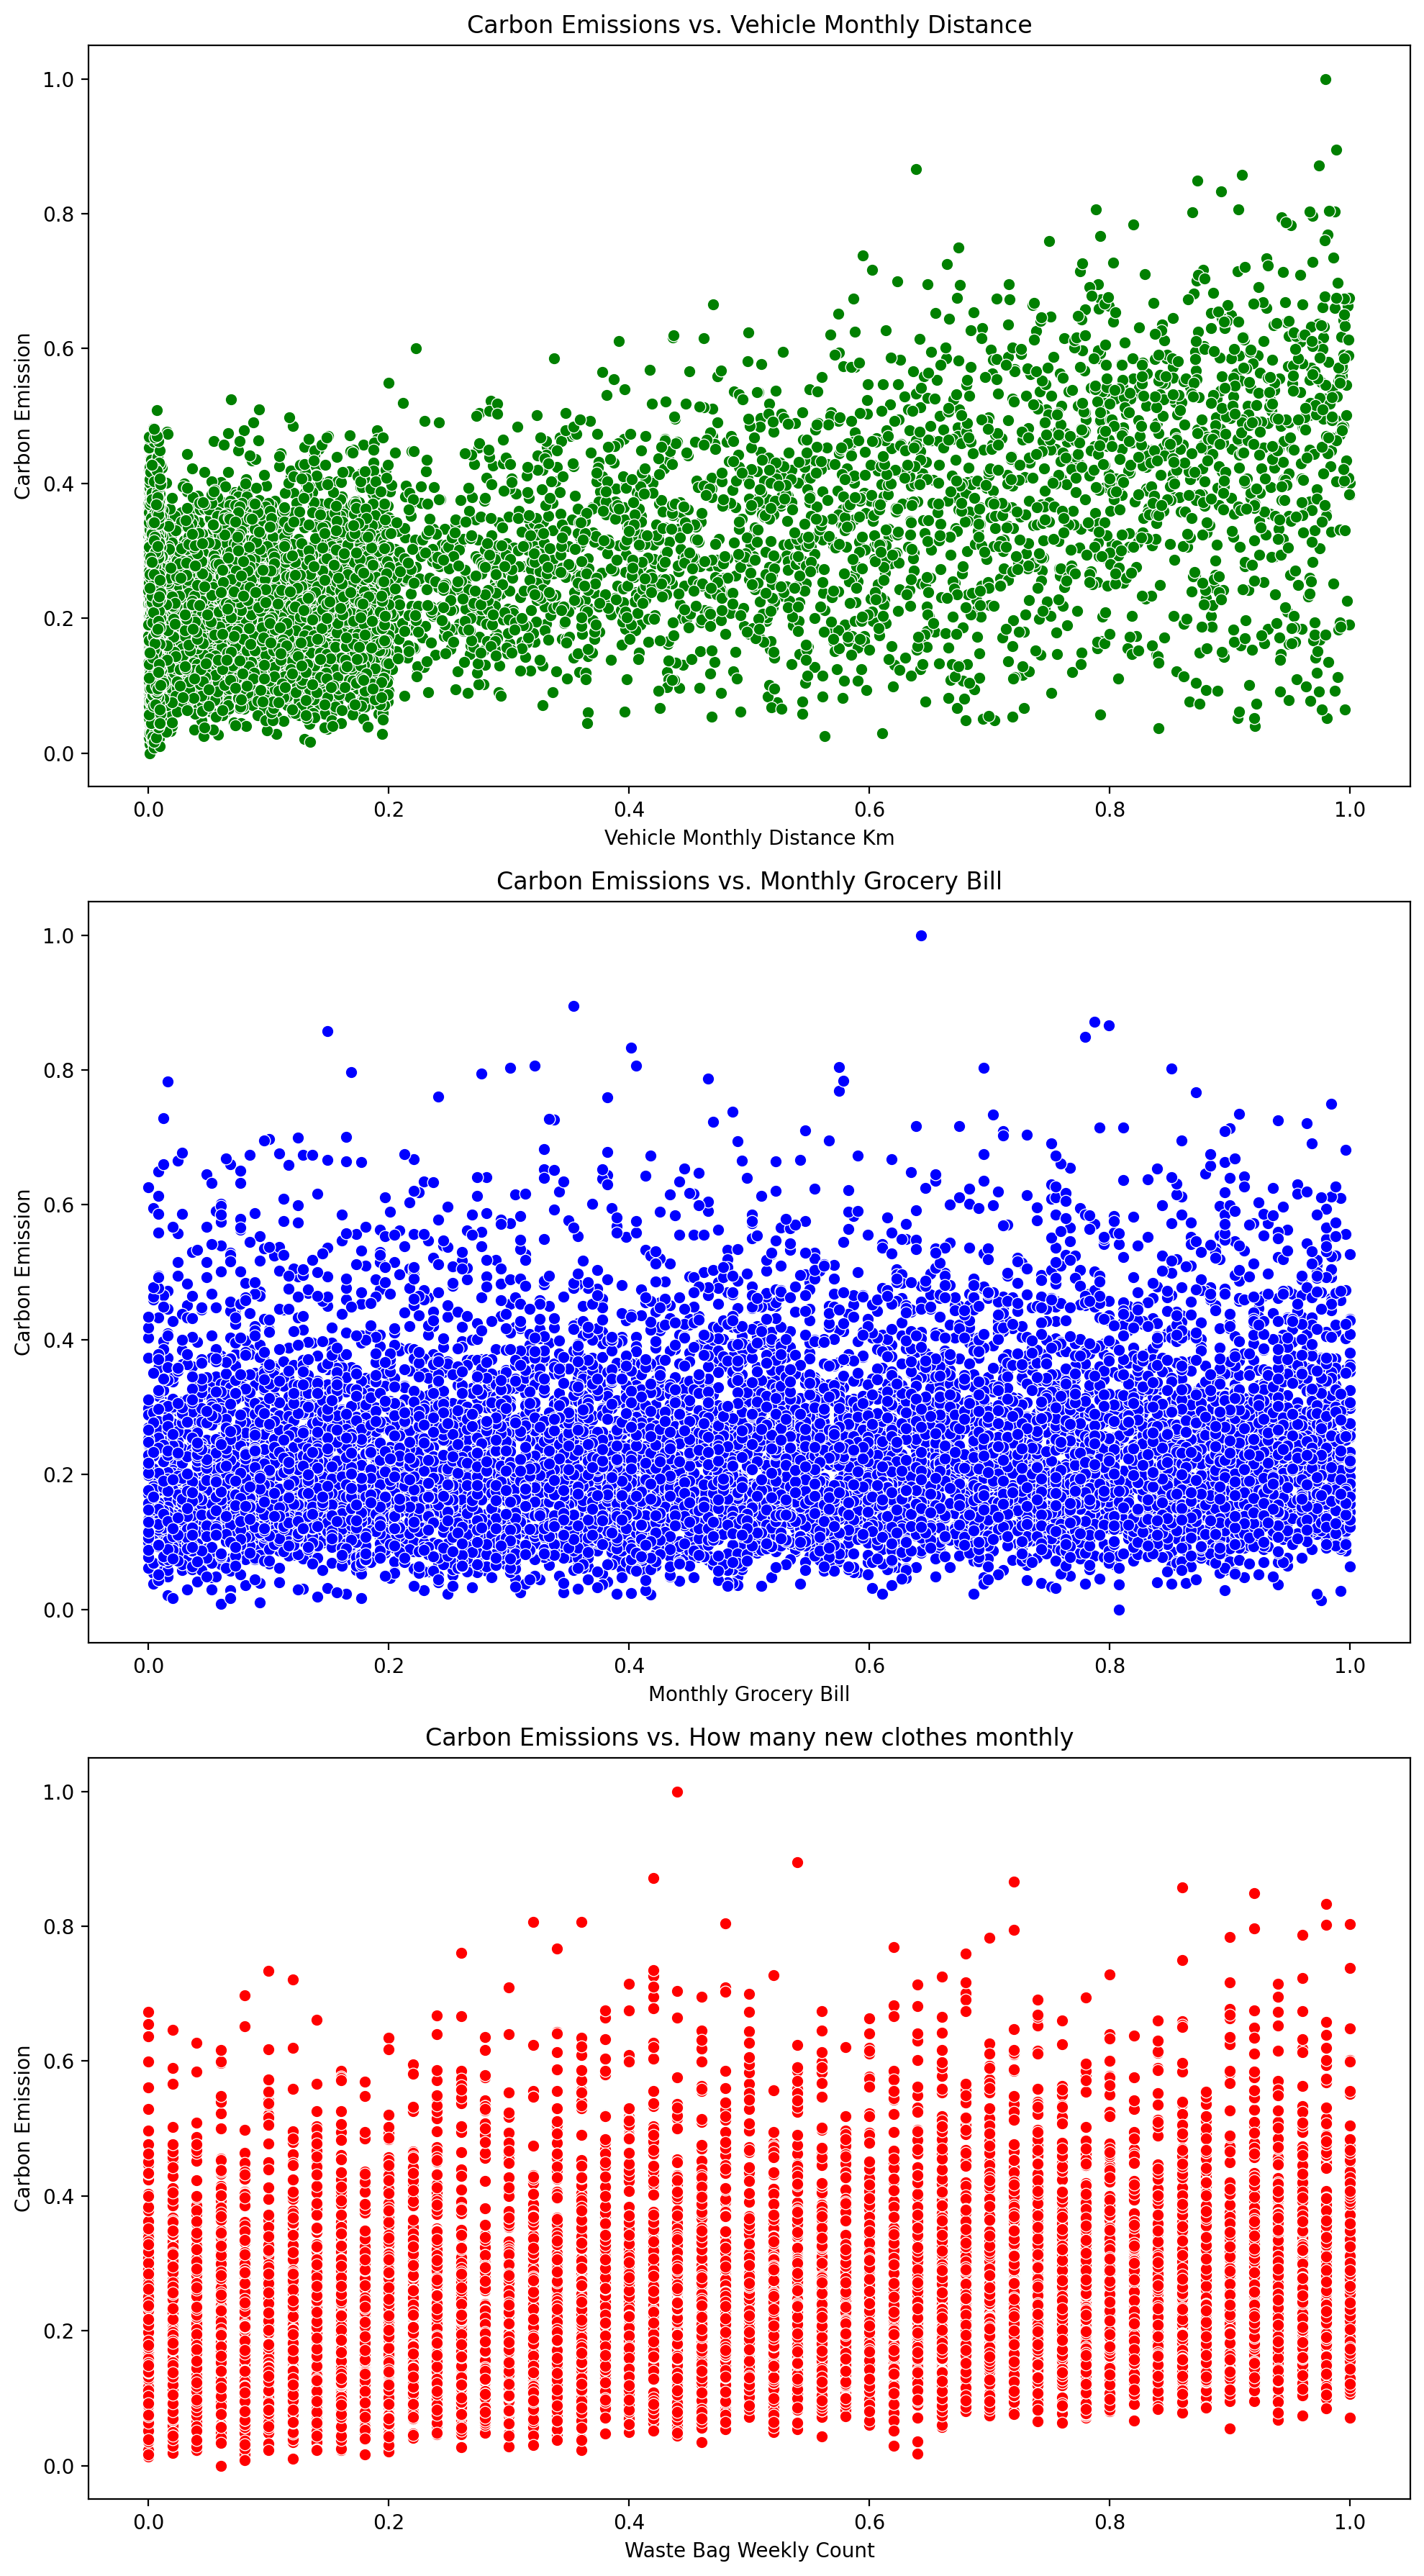

In [201]:
# set plotting parameters
fig, axes = plt.subplots(3, 1, figsize=(10, 18), dpi=200)

# Carbon Emissions vs. Monthly Grocery Bill
sns.scatterplot(ax=axes[1], x='Monthly Grocery Bill', y='CarbonEmission', data=df, color='blue')
axes[1].set_title('Carbon Emissions vs. Monthly Grocery Bill')
axes[1].set_xlabel('Monthly Grocery Bill')
axes[1].set_ylabel('Carbon Emission')


# Carbon Emissions vs. Vehicle Monthly Distance Km
sns.scatterplot(ax=axes[0], x='Vehicle Monthly Distance Km', y='CarbonEmission', data=df, color='green')
axes[0].set_title('Carbon Emissions vs. Vehicle Monthly Distance')
axes[0].set_xlabel('Vehicle Monthly Distance Km')
axes[0].set_ylabel('Carbon Emission')

# Carbon Emissions vs. how many new clothes monthly 
sns.scatterplot(ax=axes[2], x='How Many New Clothes Monthly', y='CarbonEmission', data=df, color='red')
axes[2].set_title('Carbon Emissions vs. How many new clothes monthly')  
axes[2].set_xlabel('Waste Bag Weekly Count')
axes[2].set_ylabel('Carbon Emission')

plt.tight_layout()
plt.show()


In [202]:
# Removing outliers Isolation Forest    
from sklearn.ensemble import IsolationForest

# Isolation Forest model
iforest = IsolationForest(contamination=0.1) 

# Fit 
iforest.fit(df)

# Get outlier scores
scores = iforest.decision_function(df) 

# threshold
threshold = np.percentile(scores, 90)

# Remove outliers
df = df[scores > threshold]


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


KMeans(n_clusters=5)

In [203]:

X = df[["CarbonEmission", "Vehicle Monthly Distance Km",
        'How Many New Clothes Monthly']]
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=5, random_state=42)

In [204]:
# centroids positions 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids

array([[0.20106831, 0.05749501, 0.32752066],
       [0.2121118 , 0.05995348, 0.72858447],
       [0.16732489, 0.0650947 , 0.12333333],
       [0.19810774, 0.05754467, 0.52886878],
       [0.22830568, 0.0546865 , 0.91850575]])

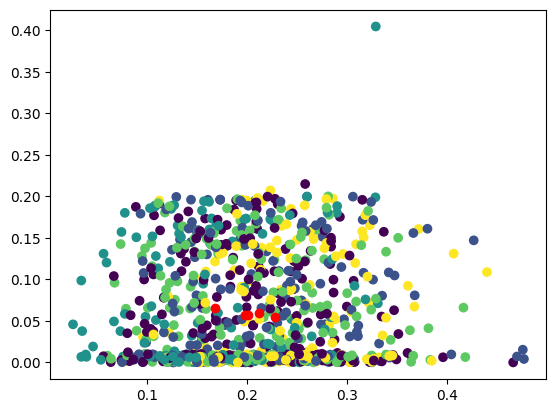

In [205]:
plt.scatter(X["CarbonEmission"], X["Vehicle Monthly Distance Km"], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()


In [206]:

from scipy.spatial.distance import cdist


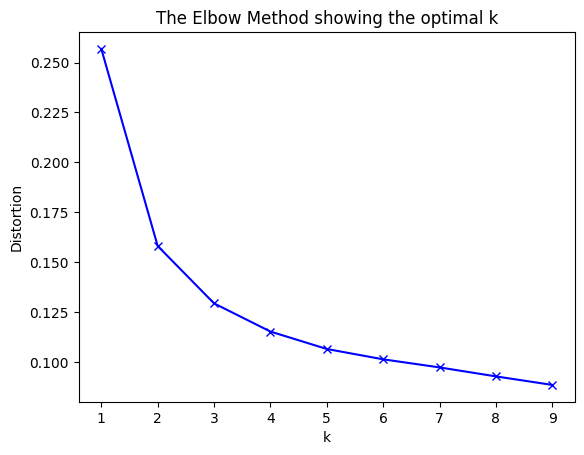

In [207]:

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [208]:

km = KMeans(n_clusters=5) 
km    


KMeans(n_clusters=5)

In [209]:
y_predict = km.fit_predict(df[["CarbonEmission", "Vehicle Monthly Distance Km"]])
y_predict

array([1, 2, 2, 0, 1, 0, 3, 1, 1, 1, 4, 3, 0, 3, 0, 2, 3, 3, 1, 3, 1, 4,
       0, 4, 2, 4, 0, 0, 1, 1, 0, 2, 3, 3, 3, 3, 2, 0, 4, 3, 3, 0, 2, 3,
       0, 4, 0, 3, 2, 2, 0, 2, 3, 1, 1, 0, 1, 3, 2, 3, 0, 1, 3, 2, 0, 3,
       1, 4, 3, 1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 1, 3, 2, 3, 3, 3, 2, 0, 3,
       0, 0, 1, 3, 3, 3, 1, 0, 0, 3, 2, 1, 3, 2, 4, 3, 1, 1, 3, 3, 3, 3,
       4, 1, 1, 0, 2, 3, 3, 3, 3, 4, 0, 0, 0, 0, 4, 1, 2, 1, 1, 2, 2, 4,
       0, 3, 1, 1, 0, 1, 3, 1, 1, 3, 0, 1, 2, 1, 3, 4, 1, 4, 0, 1, 3, 1,
       1, 3, 3, 2, 0, 1, 2, 1, 3, 1, 1, 1, 4, 2, 0, 4, 1, 0, 3, 2, 0, 2,
       1, 0, 2, 3, 4, 3, 0, 0, 0, 2, 3, 1, 0, 3, 3, 3, 2, 4, 4, 1, 1, 3,
       2, 1, 2, 3, 2, 4, 3, 1, 3, 2, 3, 1, 3, 4, 3, 3, 2, 4, 1, 3, 2, 0,
       0, 1, 3, 1, 0, 3, 1, 3, 4, 1, 3, 1, 3, 3, 1, 0, 0, 1, 0, 3, 1, 4,
       1, 3, 1, 1, 1, 1, 0, 3, 2, 3, 2, 1, 0, 2, 1, 3, 3, 2, 3, 3, 1, 3,
       2, 1, 2, 2, 3, 2, 3, 1, 0, 1, 1, 0, 0, 1, 1, 4, 3, 3, 1, 3, 3, 0,
       1, 4, 3, 0, 3, 3, 0, 3, 4, 3, 2, 3, 2, 2, 3,

In [210]:
# Cluster to df 
df['cluster'] = y_predict 
df 

,Unnamed: 0,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,...,"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[],cluster
15,15,0.702811,0.069207,0.833333,0.375000,0.48,0.625000,0.222401,0,0,...,0,0,0,0,0,0,1,0,0,1
17,17,0.216867,0.094809,0.833333,0.041667,0.12,0.916667,0.155991,0,0,...,1,0,0,0,0,0,0,0,0,2
29,29,0.835341,0.102810,0.166667,0.541667,0.88,0.166667,0.155495,0,0,...,0,0,0,0,0,0,0,0,0,2
60,60,0.827309,0.194719,0.333333,0.958333,0.66,0.333333,0.207905,0,0,...,0,0,0,0,0,0,0,1,0,0
76,76,0.738956,0.024302,0.500000,0.833333,0.72,0.208333,0.199727,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,9943,0.172691,0.000600,0.000000,0.333333,0.22,0.750000,0.131706,1,0,...,0,0,1,0,0,0,0,0,0,3
9962,9962,0.036145,0.044404,0.500000,1.000000,0.72,0.541667,0.311362,0,1,...,0,0,0,0,0,0,0,0,0,4
9971,9971,0.281124,0.008101,0.666667,0.791667,0.50,0.583333,0.366373,0,0,...,0,0,0,0,0,0,0,0,0,4
9985,9985,0.305221,0.137414,0.500000,0.416667,0.86,0.916667,0.277289,0,1,...,0,0,0,0,0,0,0,1,0,0


In [211]:

# Def and pllot the identified clusters

df1=df[df.cluster==0]
df2=df[df.cluster==1]   
df3=df[df.cluster==2] 
df4=df[df.cluster==3] 
df5=df[df.cluster==4]
df6=df[df.cluster==5]   


 



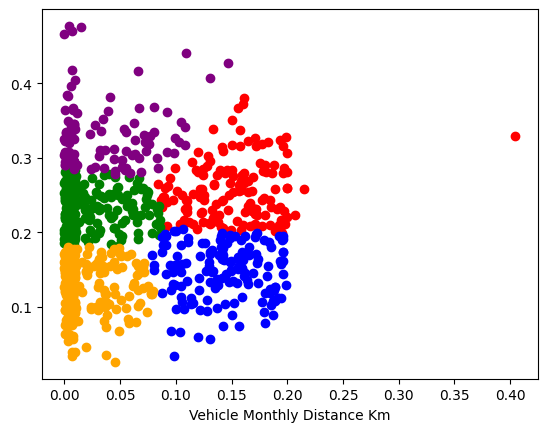

In [212]:
plt.scatter(df1['Vehicle Monthly Distance Km'], df1['CarbonEmission'], color='red')
plt.scatter(df2['Vehicle Monthly Distance Km'], df2['CarbonEmission'], color='green')
plt.scatter(df3['Vehicle Monthly Distance Km'], df3['CarbonEmission'], color='blue')
plt.scatter(df4['Vehicle Monthly Distance Km'], df4['CarbonEmission'], color='orange')  
plt.scatter(df5['Vehicle Monthly Distance Km'], df5['CarbonEmission'], color='purple')  
plt.scatter(df6['Vehicle Monthly Distance Km'], df6['CarbonEmission'], color='black')   

plt.xlabel('Vehicle Monthly Distance Km')
plt.show()

In [213]:
df

,Unnamed: 0,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,...,"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[],cluster
15,15,0.702811,0.069207,0.833333,0.375000,0.48,0.625000,0.222401,0,0,...,0,0,0,0,0,0,1,0,0,1
17,17,0.216867,0.094809,0.833333,0.041667,0.12,0.916667,0.155991,0,0,...,1,0,0,0,0,0,0,0,0,2
29,29,0.835341,0.102810,0.166667,0.541667,0.88,0.166667,0.155495,0,0,...,0,0,0,0,0,0,0,0,0,2
60,60,0.827309,0.194719,0.333333,0.958333,0.66,0.333333,0.207905,0,0,...,0,0,0,0,0,0,0,1,0,0
76,76,0.738956,0.024302,0.500000,0.833333,0.72,0.208333,0.199727,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,9943,0.172691,0.000600,0.000000,0.333333,0.22,0.750000,0.131706,1,0,...,0,0,1,0,0,0,0,0,0,3
9962,9962,0.036145,0.044404,0.500000,1.000000,0.72,0.541667,0.311362,0,1,...,0,0,0,0,0,0,0,0,0,4
9971,9971,0.281124,0.008101,0.666667,0.791667,0.50,0.583333,0.366373,0,0,...,0,0,0,0,0,0,0,0,0,4
9985,9985,0.305221,0.137414,0.500000,0.416667,0.86,0.916667,0.277289,0,1,...,0,0,0,0,0,0,0,1,0,0


In [214]:
# number of customers in each segment:
df['cluster'].value_counts()


3    299
1    294
2    152
0    151
4    104
Name: cluster, dtype: int64

In [215]:
cluster_pct = (df['cluster'].value_counts() / len(df)) * 100
cluster_pct

3    29.9
1    29.4
2    15.2
0    15.1
4    10.4
Name: cluster, dtype: float64

<AxesSubplot: ylabel='cluster'>

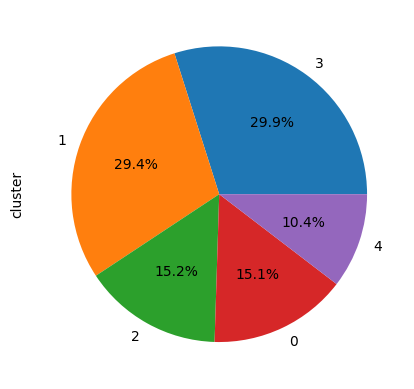

In [216]:
cluster_pct.plot.pie(autopct='%1.1f%%')


In [217]:
# PCA
from sklearn.decomposition import PCA
# fit 
pca = PCA()
pca.fit(X)
# transform 
X_pca = pca.transform(X)    

# fit kmeans on PCA 
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X_pca)

KMeans(n_clusters=3)

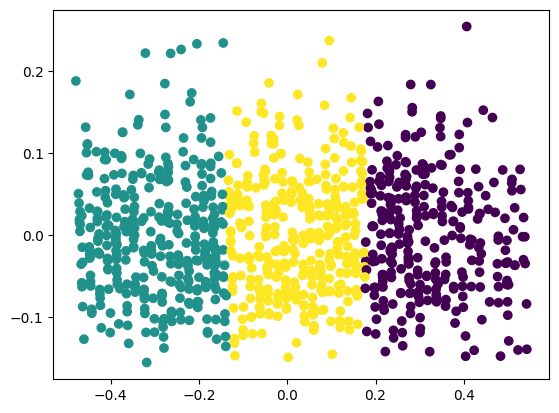

In [218]:
# plot PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)


In [219]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca, kmeans.labels_)
print(score)    


0.4096770720464129


In [220]:
# DBSCAN
from sklearn.cluster import DBSCAN
# fit
dbscan = DBSCAN()
dbscan.fit(X_pca) 
# extract labels 
dbscan_labels = dbscan.labels_  
dbscan_labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

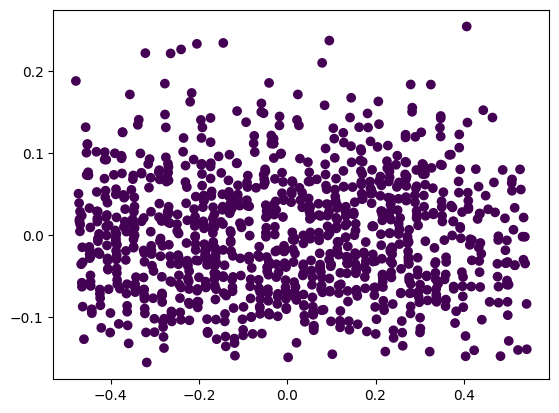

In [221]:
# db_scan Labels 
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan.labels_)


Text(0, 0.5, 'PCA Component 2')

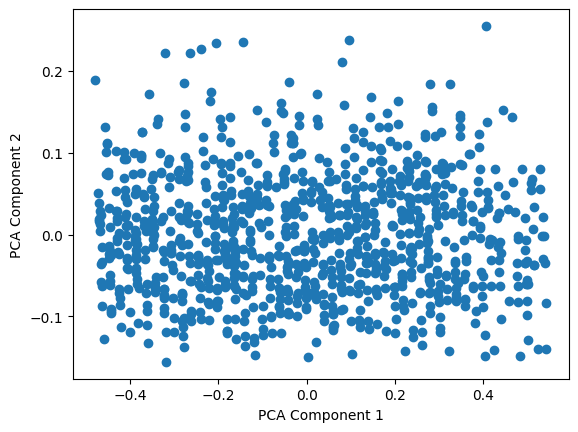

In [222]:
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [223]:
# k-means again on the PCA transformed data 


In [224]:
# PCA transforom data / fit 

pca = PCA(n_components=2) 
pca.fit(X)
X_pca = pca.transform(X)


In [225]:
# Fit Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca) 


KMeans(n_clusters=3)

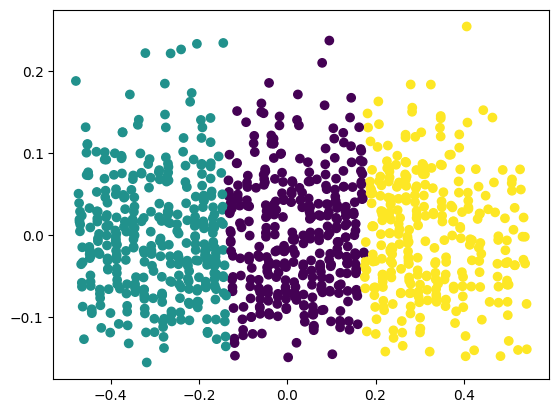

In [226]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)


In [227]:
score = silhouette_score(X_pca, kmeans.labels_)

print(score)


0.4628666622974413


In [228]:
labels = kmeans.labels_
labels_series = pd.Series(labels)
cluster_pca = (labels_series.value_counts() / len(labels_series)) * 100
cluster_pca.sort_values(ascending=False)    

1    35.4
0    34.6
2    30.0
dtype: float64

<AxesSubplot: >

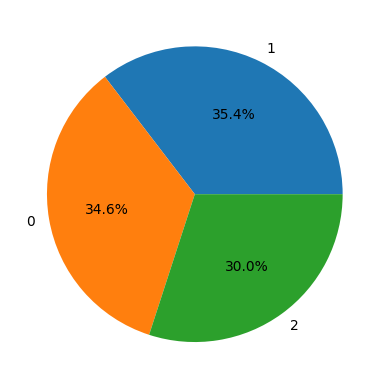

In [230]:
cluster_pca.plot.pie(autopct='%1.1f%%')

In [229]:
import pickle

# Trained modelstored in 'kmeans'

# Save model to pickle file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file) 
